<a href="https://colab.research.google.com/github/kamalkant9928/logistic-regression/blob/main/LogisticRegression_Jan18_Dani_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('bank-additional-full_final.csv')

In [ ]:
df

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."
...,...
41194,"74;""retired"";""married"";""professional.course"";""..."
41195,"74;NA;""married"";""professional.course"";""no"";""ye..."
41196,"74;""retired"";""married"";NA;""no"";""yes"";""no"";""cel..."
41197,NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;N...


In [ ]:
data=pd.read_csv('bank-additional-full_final.csv',sep=';')

In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape #no of rows and columns

(41199, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [ ]:
data.isnull().sum() #the no of null values in each column

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [ ]:
data.dropna(inplace=True) #data.fillna() -meanvalue for numerical column and for object we can pass mode value(most occured item in the column)

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
data.duplicated().sum() #check all the duplicate values in the data

13

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000
mean,40.025111,258.315346,2.567890,962.465697,0.173033,0.081893,93.575749,-40.503113,3.621230,5167.029929
std,10.423948,259.302190,2.770286,186.934918,0.494975,1.570874,0.578862,4.628082,1.734463,72.257442
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
data['y']

0         no
1         no
2         no
3         no
4         no
        ... 
41184     no
41185     no
41186    yes
41187     no
41193     no
Name: y, Length: 41177, dtype: object

In [ ]:
data['y']=np.where(data['y']=='yes',1,0) #yes = 1 and no = 0 3where method is used to find the item that is mentioned in the parameter #1,0 = int
data['y']=data['y'].astype(str) # 1 ,0 ---> "1" ,"0"

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41177 entries, 0 to 41193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41177 non-null  float64
 1   job             41177 non-null  object 
 2   marital         41177 non-null  object 
 3   education       41177 non-null  object 
 4   default         41177 non-null  object 
 5   housing         41177 non-null  object 
 6   loan            41177 non-null  object 
 7   contact         41177 non-null  object 
 8   month           41177 non-null  object 
 9   day_of_week     41177 non-null  object 
 10  duration        41177 non-null  float64
 11  campaign        41177 non-null  float64
 12  pdays           41177 non-null  float64
 13  previous        41177 non-null  float64
 14  poutcome        41177 non-null  object 
 15  emp.var.rate    41177 non-null  float64
 16  cons.price.idx  41177 non-null  float64
 17  cons.conf.idx   41177 non-null 

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
col_list=list(data.columns)

In [ ]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [ ]:
#outlier

In [ ]:
col_list.remove('y')

In [ ]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

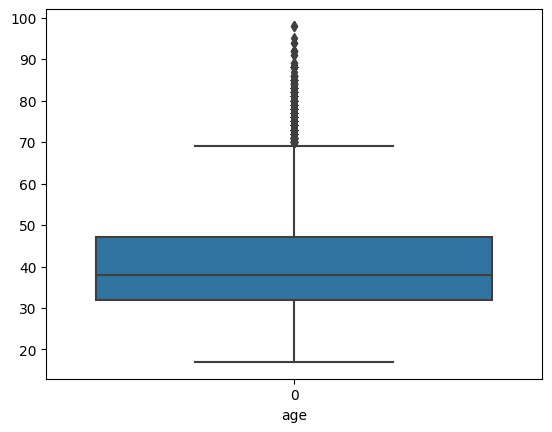

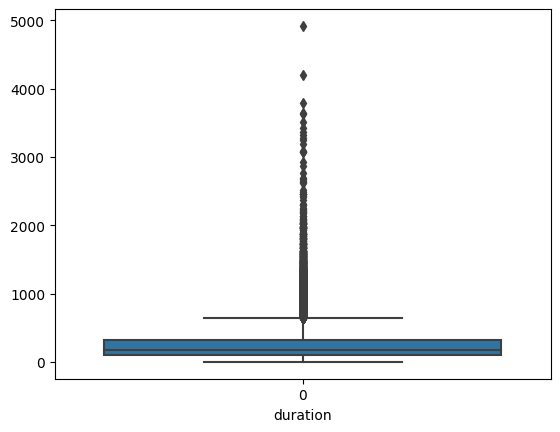

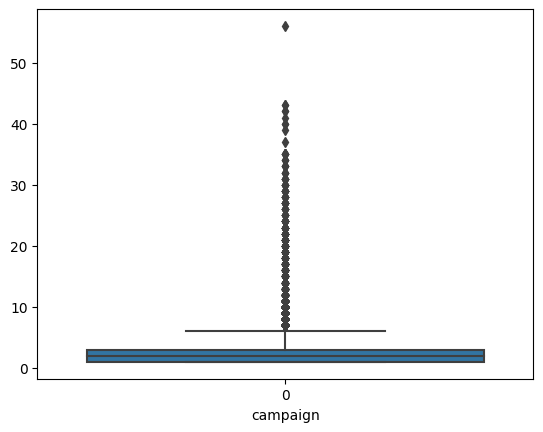

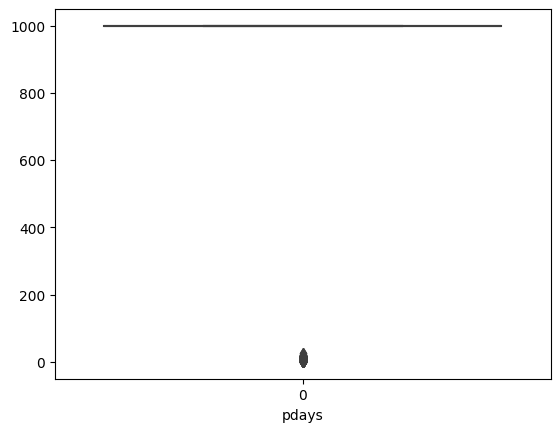

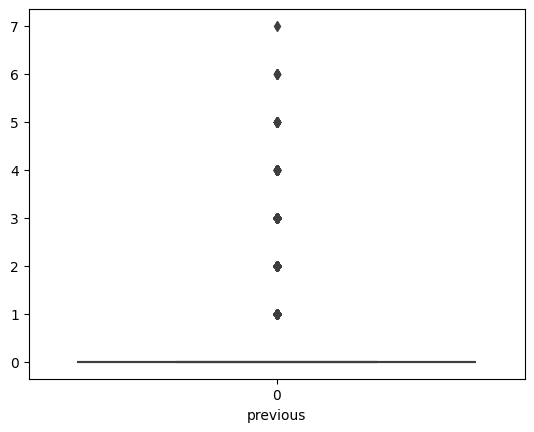

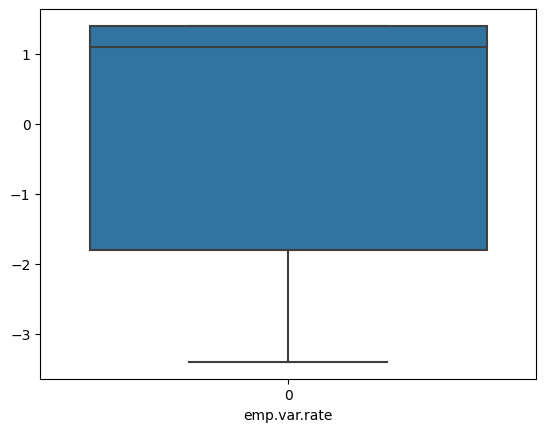

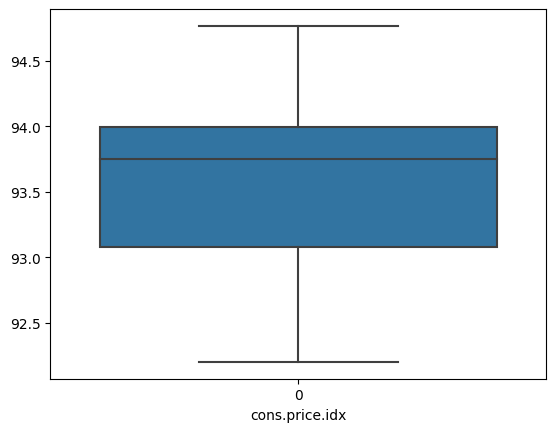

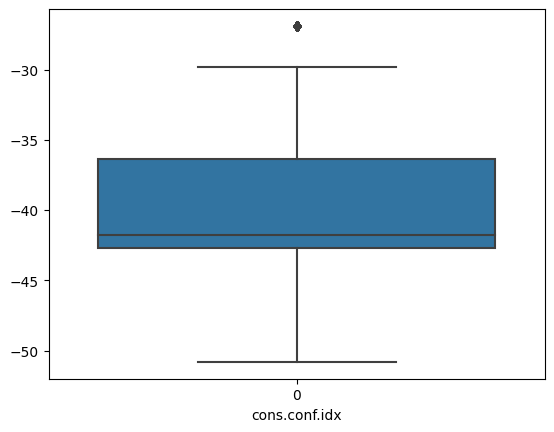

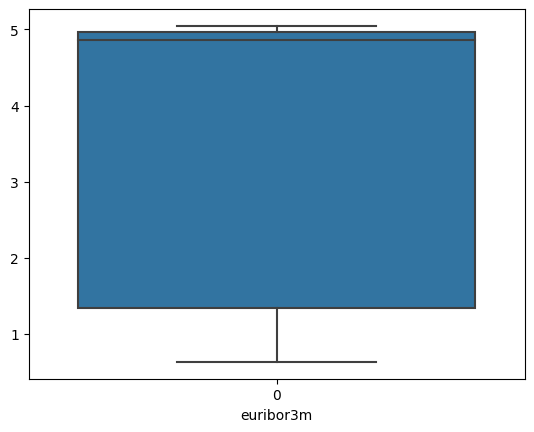

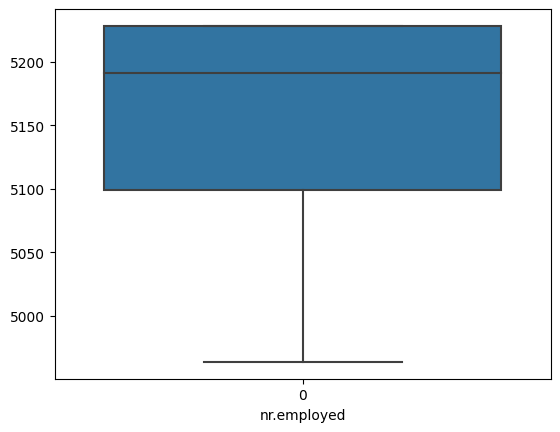

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in col_list:
    if data[i].dtype!='object':
        sns.boxplot(data[i])
        plt.xlabel(i)
        plt.show()

In [ ]:
Q1=data.age.quantile(0.25)
Q3=data.age.quantile(0.75)
IQR=Q3-Q1
UL=Q3+(IQR*1.5)
LL=Q1-(IQR*1.5)
data=data[(data.age>=LL)&(data.age<=UL)]

Q1=data.duration.quantile(0.25)
Q3=data.duration.quantile(0.75)
IQR=Q3-Q1
UL=Q3+(IQR*1.5)
LL=Q1-(IQR*1.5)
data=data[(data.duration>=LL)&(data.duration<=UL)]

Q1=data.campaign.quantile(0.25)
Q3=data.campaign.quantile(0.75)
IQR=Q3-Q1
UL=Q3+(IQR*1.5)
LL=Q1-(IQR*1.5)
data=data[(data.campaign>=LL)&(data.campaign<=UL)]

Q1=data.previous.quantile(0.25)
Q3=data.previous.quantile(0.75)
IQR=Q3-Q1
UL=Q3+(IQR*1.5)
LL=Q1-(IQR*1.5)
data=data[(data.previous>=LL)&(data.previous<=UL)]

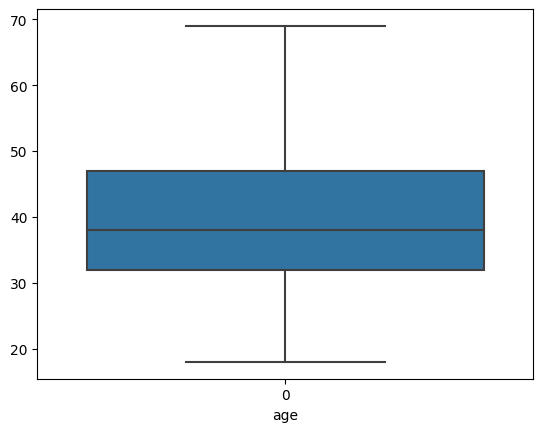

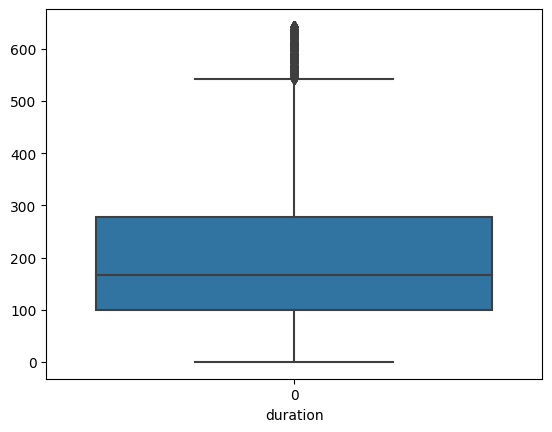

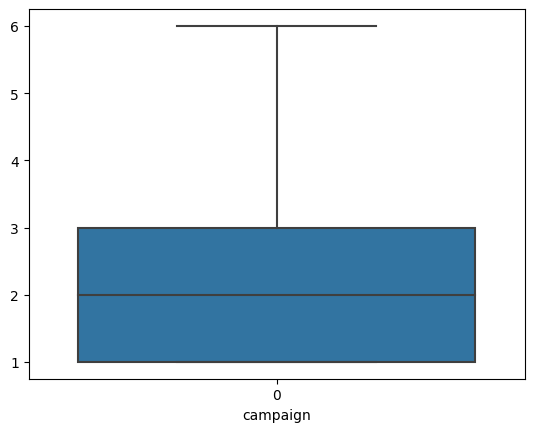

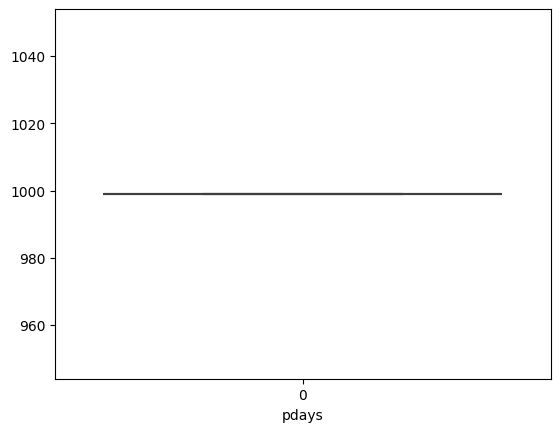

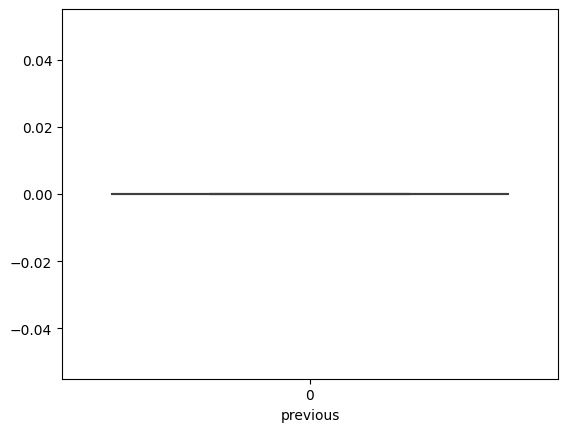

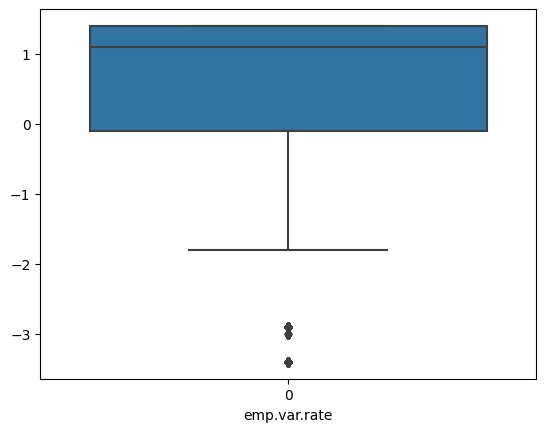

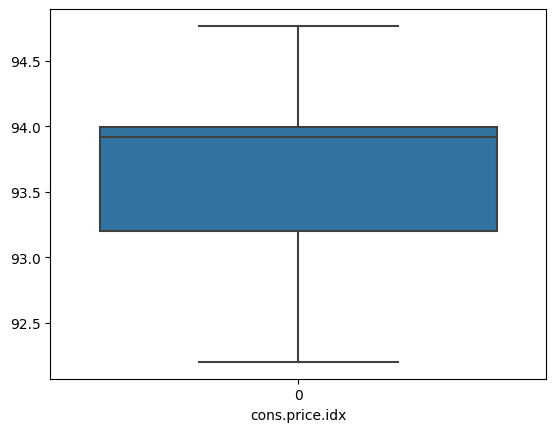

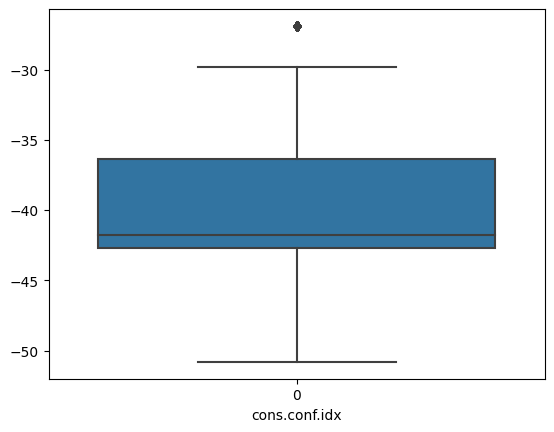

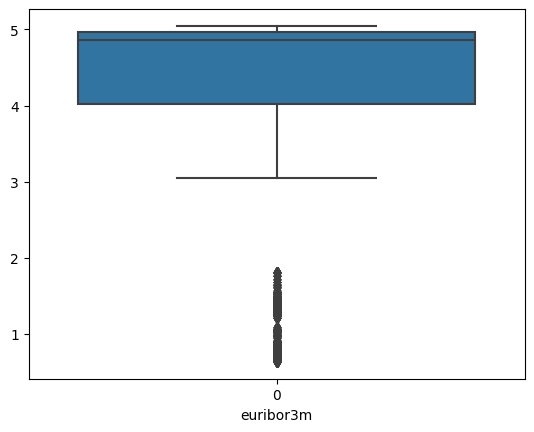

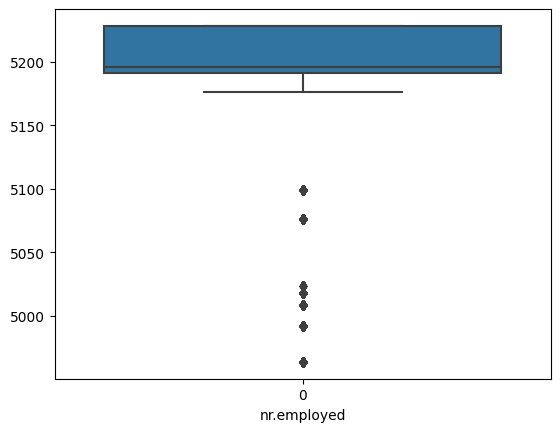

In [ ]:
for i in col_list:
    if data[i].dtype!='object':
        sns.boxplot(data[i])
        plt.xlabel(i)
        plt.show()

In [ ]:
col_list=[]
for col in data.columns:
    if((data[col].dtype=='object')):
        col_list.append(col)

In [ ]:
col_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in col_list:
    data[i]=le.fit_transform(data[i])

In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36.0,0,1,6,0,0,0,0,7,0,...,2.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41181,37.0,0,1,6,0,2,0,0,7,0,...,1.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46.0,1,1,5,0,0,0,0,7,0,...,1.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,5,1,6,0,2,0,0,7,0,...,2.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30562 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30562 non-null  float64
 1   job             30562 non-null  int32  
 2   marital         30562 non-null  int32  
 3   education       30562 non-null  int32  
 4   default         30562 non-null  int32  
 5   housing         30562 non-null  int32  
 6   loan            30562 non-null  int32  
 7   contact         30562 non-null  int32  
 8   month           30562 non-null  int32  
 9   day_of_week     30562 non-null  int32  
 10  duration        30562 non-null  float64
 11  campaign        30562 non-null  float64
 12  pdays           30562 non-null  float64
 13  previous        30562 non-null  float64
 14  poutcome        30562 non-null  int32  
 15  emp.var.rate    30562 non-null  float64
 16  cons.price.idx  30562 non-null  float64
 17  cons.conf.idx   30562 non-null 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg=LogisticRegression()

In [ ]:
x=data.drop(columns='y')
y=data['y']

In [ ]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0
1,57.0,7,1,3,1,0,0,1,6,1,149.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0
2,37.0,7,1,3,0,2,0,1,6,1,226.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0
4,56.0,7,1,3,0,0,2,1,6,1,307.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36.0,0,1,6,0,0,0,0,7,0,254.0,2.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6
41181,37.0,0,1,6,0,2,0,0,7,0,281.0,1.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46.0,1,1,5,0,0,0,0,7,0,383.0,1.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,5,1,6,0,2,0,0,7,0,189.0,2.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41180    0
41181    1
41184    0
41185    0
41186    1
Name: y, Length: 30562, dtype: int32

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
selector=RFE(lg,n_features_to_select=14,step=1)
selector=selector.fit(x_train,y_train)

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [ ]:
selector.support_

array([False,  True,  True,  True,  True, False, False,  True,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True,  True])

In [ ]:
selector.ranking_

array([2, 1, 1, 1, 1, 4, 5, 1, 1, 1, 3, 1, 1, 6, 7, 1, 1, 1, 1, 1])

In [ ]:
x_train_rfe=selector.transform(x_train)
x_test_rfe=selector.transform(x_test)

In [ ]:
x_train_rfe.shape

(24449, 14)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
model=lg.fit(x_train_rfe,y_train)

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred=model.predict(x_test_rfe)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9450351709471618

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[5770,    5],
       [ 331,    7]], dtype=int64)

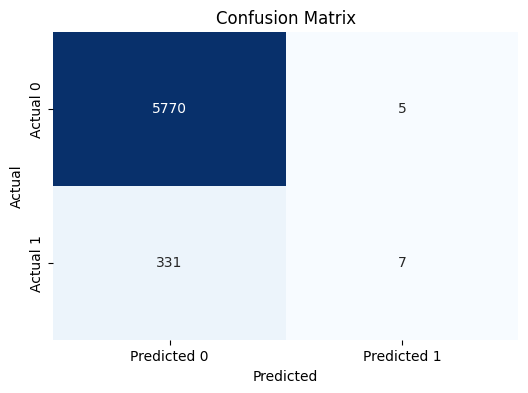

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False,
           xticklabels=['Predicted 0','Predicted 1'],
           yticklabels=['Actual 0','Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
TP = 7
TN = 5770
FP = 5
FN = 331